# Modellierung: Regressions- und Klassifikationsmodelle auf Finanzdaten

In diesem Notebook werden verschiedene Modelle auf einem Finanzdatensatz angewendet. Ziel ist es, sowohl Regressions- als auch Klassifikationsmodelle zu erstellen und zu evaluieren. Folgende Modelle werden betrachtet:

- **Multiple Lineare Regression (MLR):** Vorhersage der absoluten Rendite (|Return|)

- **Naive Bayes:** Klassifikation der Kursrichtung (steigend/fallend)

- **Lineare Diskriminanzanalyse (LDA):** Klassifikation der Kursrichtung

- **Logistische Regression:** Klassifikation der Kursrichtung




Das Notebook ist in mehrere Abschnitte gegliedert, die jeweils durch Markdown-Zellen erläutert werden.

## **1. Abhängikeiten laden & Daten einlesen**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.modeling.models import mlr, naive_bayes, lda, logistic_regression_classifier
from utils.modeling.evaluation import evaluate_regression, evaluate_classification

df = pd.read_csv('data/merged/merged_by_timestamp.csv')
display(df.head())
display(df.tail())


,Timestamp,Open,High,Low,Close,Return,|Return|,Volume,event_count,impact_sum,...,cat_inflation_impact_sum,cat_interest_rate_impact_sum,cat_labor_market_impact_sum,cat_politics_impact_sum,cat_central_banks_impact_max,cat_economic_activity_impact_max,cat_inflation_impact_max,cat_interest_rate_impact_max,cat_labor_market_impact_max,cat_politics_impact_max
0,2012-06-19 23:00:00,1619.40,1619.64,1619.39,1619.64,0.014820,0.014820,63,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-19 23:30:00,1619.63,1622.60,1619.63,1620.51,0.183375,0.183375,1357,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-20 00:00:00,1620.53,1620.85,1619.76,1620.36,-0.047515,0.047515,1701,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-20 00:30:00,1620.35,1620.46,1618.08,1618.91,-0.140093,0.140093,1703,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-20 01:00:00,1618.90,1621.28,1618.82,1620.25,0.147013,0.147013,1902,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Timestamp,Open,High,Low,Close,Return,|Return|,Volume,event_count,impact_sum,...,cat_inflation_impact_sum,cat_interest_rate_impact_sum,cat_labor_market_impact_sum,cat_politics_impact_sum,cat_central_banks_impact_max,cat_economic_activity_impact_max,cat_inflation_impact_max,cat_interest_rate_impact_max,cat_labor_market_impact_max,cat_politics_impact_max
150604,2025-05-14 09:30:00,3234.46,3235.62,3230.48,3232.60,-0.123050,0.123050,5588,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150605,2025-05-14 10:00:00,3232.68,3234.87,3229.31,3231.59,-0.104248,0.104248,6071,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150606,2025-05-14 10:30:00,3231.45,3236.53,3229.17,3232.30,0.157205,0.157205,5359,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150607,2025-05-14 11:00:00,3232.23,3235.22,3229.90,3233.09,0.092506,0.092506,4500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150608,2025-05-14 11:30:00,3232.92,3236.50,3229.64,3235.67,0.110736,0.110736,4999,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wichtige Uhrzeiten übernehmen

## **2. Datenfilterung**

Hier wird eine Maske erstellt welche die ```top_times```, die Top Uhrzeiten geflitert im [02_eda.ipynb](02_eda.ipynb), erschließt.

Die Maske besteht aus folgendn Uhrzeiten:
- 13:30:00
- 15:00:00
- 19:00:00

Dadurch konzentrieren wir uns auf Zeitpunkte, an denen relevante Ereignisse im Datensatz vorliegen.

In [2]:
top_times = ["13:30:00", "15:00:00", "19:00:00"]

mask_times   = df["Timestamp"].str.endswith(tuple(top_times))
mask_events  = df["event_count"] > 0
mask         = mask_times & mask_events

display(df.loc[mask].head())
display(df.loc[mask].tail())

,Timestamp,Open,High,Low,Close,Return,|Return|,Volume,event_count,impact_sum,...,cat_inflation_impact_sum,cat_interest_rate_impact_sum,cat_labor_market_impact_sum,cat_politics_impact_sum,cat_central_banks_impact_max,cat_economic_activity_impact_max,cat_inflation_impact_max,cat_interest_rate_impact_max,cat_labor_market_impact_max,cat_politics_impact_max
40,2012-06-20 19:00:00,1607.00,1607.78,1601.70,1607.03,-0.329807,0.329807,3842,1.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
75,2012-06-21 13:30:00,1584.80,1587.40,1578.85,1579.40,-0.375442,0.375442,2617,2.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78,2012-06-21 15:00:00,1585.11,1585.24,1571.56,1571.62,-0.854830,0.854830,7698,2.0,4.0,...,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
163,2012-06-25 13:30:00,1572.55,1572.98,1568.87,1571.50,-0.234015,0.234015,5239,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
212,2012-06-26 15:00:00,1570.66,1572.04,1567.89,1570.49,-0.176359,0.176359,5731,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,Timestamp,Open,High,Low,Close,Return,|Return|,Volume,event_count,impact_sum,...,cat_inflation_impact_sum,cat_interest_rate_impact_sum,cat_labor_market_impact_sum,cat_politics_impact_sum,cat_central_banks_impact_max,cat_economic_activity_impact_max,cat_inflation_impact_max,cat_interest_rate_impact_max,cat_labor_market_impact_max,cat_politics_impact_max
150159,2025-04-30 15:00:00,3308.88,3313.80,3298.71,3304.64,-0.307355,0.307355,8695,6.0,14.0,...,10.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0
150202,2025-05-01 13:30:00,3220.04,3232.68,3218.58,3226.85,0.392542,0.392542,8178,3.0,4.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
150205,2025-05-01 15:00:00,3224.28,3228.28,3214.31,3222.93,-0.309216,0.309216,9114,5.0,10.0,...,2.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,2.0,0.0
150248,2025-05-02 13:30:00,3257.98,3263.01,3250.27,3250.48,-0.236650,0.236650,8743,7.0,16.0,...,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
150251,2025-05-02 15:00:00,3250.46,3257.99,3242.22,3253.36,-0.253503,0.253503,8600,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


## **3. Feature-Engineering**
Erstellt verschobene Features und berechnet prozentuale Preisänderungen.

In [3]:
df["Volume_shifted"]         = df["Volume"].shift(1)
df["|Return|_shifted1"]      = df["|Return|"].shift(1)
df["|Close_pct_change_2h|"]  = ((df["Close"].shift(1) - df["Close"].shift(5)) / df["Close"].shift(5) * 100).abs()
df["|Close_pct_change_4h|"]  = ((df["Close"].shift(1) - df["Close"].shift(9)) / df["Close"].shift(5) * 100).abs()


mask &= df["Volume_shifted"].notna()

print("shape nach Maskierung:", df.loc[mask].shape)

shape nach Maskierung: (3888, 41)


## **4. Zielvariablen und Features**
Definiert die Targets und entfernt nicht benötigte Spalten.


In [4]:
df["Label"] = (df["Return"] >= 0).astype(int)

drop_columns = [
    "Open", "High", "Low", "Close",
    "Return", "|Return|", "Volume",
    "Timestamp", "Label"
]

X = df.loc[mask].drop(columns=drop_columns, errors="ignore")
print("Anzahl der Datenpunkte in X:", len(X))

y_regression     = df.loc[mask, "|Return|"].values
y_classification = df.loc[mask, "Label"].values


Anzahl der Datenpunkte in X: 3888


## **5. Regression mit Bootstrap-Intervallen**

Coefficients with bootstrap confidence intervals:


,Coefficient,CI_95%_lower,CI_95%_upper
Feature,,,
Intercept,0.179038,0.024939,0.343780
event_count,0.013226,-0.054447,0.081476
impact_sum,0.006736,-0.017872,0.033459
impact_mean,-0.037501,-0.164788,0.078623
impact_max,0.146702,-0.009423,0.317532
impact_min,-0.093820,-0.265252,0.077369
impact_std,-0.060636,-0.179505,0.061995
impact_count_0,0.038666,-0.063175,0.142319
impact_count_1,-0.033484,-0.081435,0.013497



--- TRAIN ---
R²  : 0.2697
RMSE: 0.2079
MAE : 0.1454

--- TEST ---
R²  : 0.2578
RMSE: 0.2056
MAE : 0.1402

=== Last Test Sample ===
True y      : 0.2688
Predicted y : 0.3535
PI (95%) : [0.3107, 0.3973]


c:\Users\anton\Documents\Projekte\Projekte\data_science_uni\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anton\Documents\Projekte\Projekte\data_science_uni\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


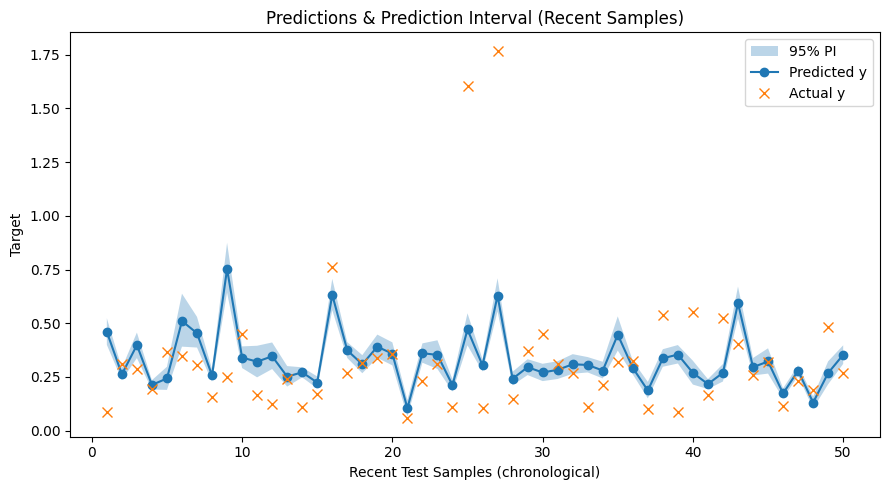

In [5]:
model1, X_tr, X_te, y_tr, y_te = mlr(
    X, y_regression,
    train_ratio=0.5,
    random_state=42,
    n_bootstrap=10_000,
    ci=0.95
)

evaluate_regression(model1, X_tr, y_tr, X_te, y_te, n_last=50)


### Interpretation
*Prognosemodell: absoluter, prozentualer 30-Min-Return nach News-Veröffentlichung*

##### 1 ) Güte der Gesamt­gleichung  

| Kennzahl | Train | Test | Interpretation |
|----------|------:|-----:|----------------|
| **R²**   | 0.269 | 0.258 | ≈ 26 % der Varianz wird erklärt – bei hoch­frequenten Finanz­daten beachtlich, aber das meiste bleibt Rauschen. |
| **RMSE** | 0.208 | 0.206 | Fehler liegt in ähnlicher Größen­ordnung wie der mittlere Target-Wert. |
| **MAE**  | 0.145 | 0.140 | Robustes Fehler­maß bestätigt RMSE-Befund. |
| **Train vs. Test** | – | – | Fast identische Ergebnisse ⇒ kaum Overfitting; lineares Modell stößt schlicht an Grenzen. |


##### 2 ) Bedeutung der Koeffizienten (Bootstrap-CIs)  

| Feature (Auswahl) | β | 95 %-CI | Deutung |
|-------------------|---:|:-------:|---------|
| `\|Return\|_shifted1` | **0.25** | [+0.17; +0.35] | Volatility-Clustering: vergangene Schwankung setzt sich fort. |
| `cat_interest_rate_impact_max` | **0.03** | [+0.01; +0.05] | Zins-Schlagzeilen erhöhen Volatilität signifikant. |
| `cat_labor_market_impact_max` | **-0.03** | [-0.04; -0.01] | Arbeitsmarkt-News senken Volatilität – Reaktion oft vorab eingepreist. |
| `impact_max` | 0.15 | [-0.01; +0.32] | Grenzwertig positiv: einzelne „laute“ Meldungen wirken wohl. |
| Weitere Aggregats- & Preis­features | – | CI überlappt 0 | Kein robuster Einfluss → möglicher Feature-Overload. |



##### 3 ) Prognose­intervalle & Fehlerbild  

*Plot-Beobachtungen*  
- Blaue Fläche deckt die meisten Punkte → PIs sind brauchbar.  
- Extreme Returns (≈ 1.5 – 1.8 %) liegen komplett außerhalb ⇒ Varianz nicht konstant (Heavy Tails).  
- Vorhersage­linie glättet Peaks – typisch MSE-optimiertes lineares Modell.


##### 4 ) TL;DR  

- Modell erklärt **≈ 26 %** der 30-Min-Volatilität – solide für einen linearen Ansatz.  
- Signifikanter Nutzen: **Vorperioden-Volatilität** & starke **Zins/Arbeitsmarkt-News**.  
- **Generalisiert** ordentlich, überfit­tet nicht, wird aber durch Rauschen & fette Schwänze begrenzt.  
- Mehr Power erfordert **nicht-lineare Modelle** und **bessere Fehler­modellierung**.

---


## **6. Gewichtskonstruktion**

Die Gewichte basieren auf dem einfachen Verhältnis

**ρ = Mittelwert mit News / Mittelwert Baseline**

für jede News-Kategorie.  
Alle ρ-Werte sind positiv und können daher direkt als Gewichte in einer
gewichteten linearen Regression verwendet werden.

### Input-Daten und abgeleitete Gewichte

| Kategorie           | Mittelwert mit News | Mittelwert Baseline | Gewicht ρ (News / Baseline) |
|---------------------|--------------------:|--------------------:|----------------------------:|
| politics            | 0.1612 | 0.1734 | 0.9296 |
| interest_rate       | 0.6288 | 0.1734 | 3.6262 |
| labor_market        | 0.3527 | 0.1734 | 2.0340 |
| inflation           | 0.3594 | 0.1734 | 2.0726 |
| central_banks       | 0.2886 | 0.1734 | 1.6643 |
| economic_activity   | 0.2885 | 0.1734 | 1.6637 |


In [6]:
weight_map = {
    "politics":          0.9296,
    "interest_rate":     3.6262,
    "labor_market":      2.0340,
    "inflation":         2.0726,
    "central_banks":     1.6643,
    "economic_activity": 1.6637,
}

X["weighted_col"] = X.apply(
    lambda row: max([weight_map[c] for c in weight_map if row[f"cat_{c}_event_count"] > 0], default=0),
    axis=1
)

## **7. Gewichtete Multiple Lineare Regression (MLR)**

Es wird eine multiple lineare Regression auf die absolute Rendite (|Return|) durchgeführt, um Zusammenhänge zwischen den Features und der Zielgröße zu untersuchen.

Coefficients with bootstrap confidence intervals:


,Coefficient,CI_95%_lower,CI_95%_upper
Feature,,,
Intercept,0.197149,0.033043,0.366444
event_count,0.003917,-0.071337,0.071649
impact_sum,0.009263,-0.014653,0.038703
impact_mean,-0.038809,-0.169926,0.079491
impact_max,0.148147,-0.016371,0.328338
impact_min,-0.100795,-0.278169,0.077069
impact_std,-0.034852,-0.163501,0.093637
impact_count_0,0.029189,-0.084787,0.130173
impact_count_1,-0.036747,-0.082621,0.015209



--- TRAIN ---
R²  : 0.2683
RMSE: 0.2081
MAE : 0.1456

--- TEST ---
R²  : 0.2547
RMSE: 0.2060
MAE : 0.1412

=== Last Test Sample ===
True y      : 0.2688
Predicted y : 0.3596
PI (95%) : [0.3132, 0.4057]


c:\Users\anton\Documents\Projekte\Projekte\data_science_uni\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anton\Documents\Projekte\Projekte\data_science_uni\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


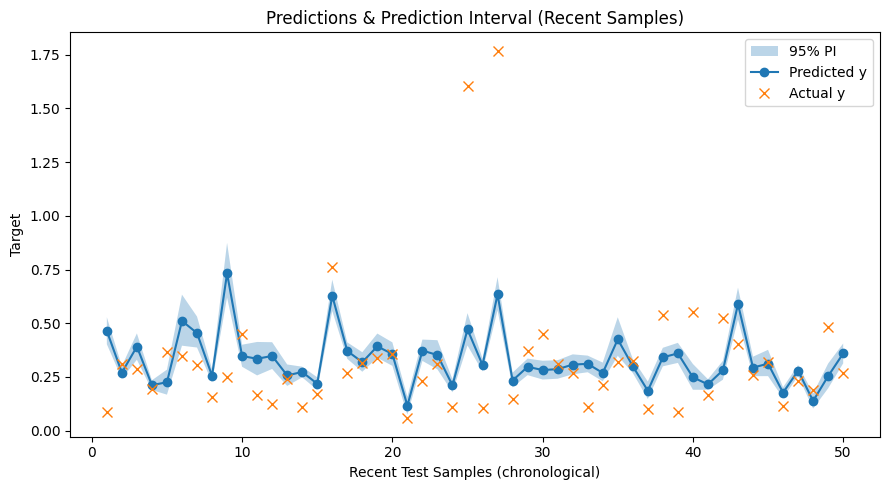

In [7]:
model2, X_train2, X_test2, y_train2, y_test2 = mlr(
    X, y_regression,
    train_ratio=0.5,
    random_state=42,
    n_bootstrap=10_000,
    ci=0.95,
    weight="weighted_col"
)
evaluate_regression(model2, X_train2, y_train2, X_test2, y_test2)


### Interpretation 

##### 0 ) Kurzüberblick  

| Modell | Gewichtung | R² (Test) | RMSE (Test) | MAE (Test) |
|--------|-----------|-----------|-------------|------------|
| **Ungewichtet** | – | **0.258** | 0.206 | 0.140 |
| **Gewichtet**   | ✓ | **0.255** | 0.206 | 0.141 |

> **Take-away:** Die Gewichtung verändert die Gesamtgüte **kaum** – alle Fehler­metriken bleiben praktisch identisch.  

##### 1 ) Güte der gewichteten Regression  

| Kennzahl | Train | Test | Interpretation |
|----------|------:|-----:|----------------|
| **R²**   | 0.268 | 0.255 | ≈ 25 % erklärte Varianz – identisch zum ungewichteten Modell. |
| **RMSE** | 0.208 | 0.206 | Fehlergröße weiterhin in derselben Größenordnung wie der Zielwert selbst. |
| **MAE**  | 0.146 | 0.141 | Spiegelt RMSE-Befund; kein Overfitting sichtbar (Train≈Test). |

##### 2 ) Feature-Effekte (Bootstrap-CIs, gewichtetes Modell)  

| Feature (Auswahl) | β | 95 %-CI | Deutung |
|-------------------|---:|:-------:|---------|
| `\|Return\|_shifted1` | **0.27** | [+0.18; +0.37] | Volatility-Clustering; Effekt **größer** als im Basis-Modell (+0.25). |
| `cat_interest_rate_event_count` | **0.011** | [+0.004; +0.018] | *Neu signifikant*: Schon die **Anzahl** von Zins-Meldungen treibt Volatilität. |
| `cat_interest_rate_impact_sum` | **0.032** | [+0.011; +0.055] | Bleibt klar positiv; Gewichtung verstärkt den Effekt leicht. |
| `impact_max` | 0.15 | [−0.02; +0.33] | Grenzwertig, ähnlich wie Basis-Modell. |
| `cat_labor_market_impact_sum` | 0.018 | [−0.006; +0.045] | Nicht mehr signifikant (überlappt 0) – Gewichtung **schwächt** diesen Einfluss. |
| `Volume_shifted` | ~0 | CI enthält 0 | Weiterhin vernachlässigbar. |
| *Restliche Aggregats-/Preis-Features* | – | CI überlappt 0 | Kein robuster Einfluss – unverändert. |

**Was hat sich geändert?**  
- **Zinsrelevante Variablen** gewinnen an Bedeutung (Event-Count & Impact-Sum beide signifikant).  
- **Arbeitsmarkt-Signale** verlieren Signifikanz.  
- Gesamte Varianzaufklärung bleibt jedoch gleich – die Gewichtung verschiebt **relativ** die Wichtigkeit einzelner Prädiktoren, nicht aber die Gesamtleistung.

##### 3 ) Prognoseintervalle & Fehlerbild  

*Visualeinschätzung (identisch zu Basis-Plot)*  
- 95 %-Intervalle decken die meisten tatsächlichen Werte ab.  
- Die extremsten Returns (> 1.5 %) liegen weiterhin außerhalb ⇒ Heavy-Tail-Problem bleibt ungelöst.  
- Keine sichtbare systematische Verzerrung durch die Gewichtung.

##### 4 ) Interpretation des Gewichtungs­effekts  

| Beobachtung | Mögliche Ursache |
|-------------|------------------|
| **Stabile Gesamtmetriken** | Gewicht scheinen v. a. Beobachtungen zu betreffen, die bereits im linearen Rahmen gut erklärbar sind; sie ändern nicht das inhärente Rausch-/Signal-Verhältnis. |
| **Stärkere Zinssensitivität** | Gewichtung könnte Perioden mit makro-relevanten Bewegungen (z. B. FOMC-Tage) höher bewertet haben. |
| **Abnehmende Arbeitsmarkt-Relevanz** | Entweder geringeres Gewicht auf NFP-Tage oder Überbetonung anderer Event-Typen. |

##### 5 ) TL;DR  

- **Leistungs­gleichstand**: Gewichtung ändert die Modellgüte **nicht** spürbar.  
- **Signalverschiebung**: Zinsspezifische Features werden wichtiger, Arbeitsmarkt-Effekte schwächer.  
- **Nächster Schritt**: Mehr Modellflexibilität & fokussierte Feature-Selektion, um den durch Gewichtung angedeuteten Informationsgewinn besser auszuschöpfen.  

---


## **8. Naive Bayes Klassifikation**

Im nächsten Schritt wird ein Naive Bayes Modell verwendet, um die Richtung der Kursbewegung (steigend/fallend) zu klassifizieren.

Hier führen wir eine Klassifikation durch, ob der Kurs steigt oder fällt. Als Input werden alle verfügbaren Features genutzt.



=== TRAIN Classification Report ===
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      1341
           1       0.54      0.58      0.55      1380

    accuracy                           0.53      2721
   macro avg       0.53      0.53      0.53      2721
weighted avg       0.53      0.53      0.53      2721



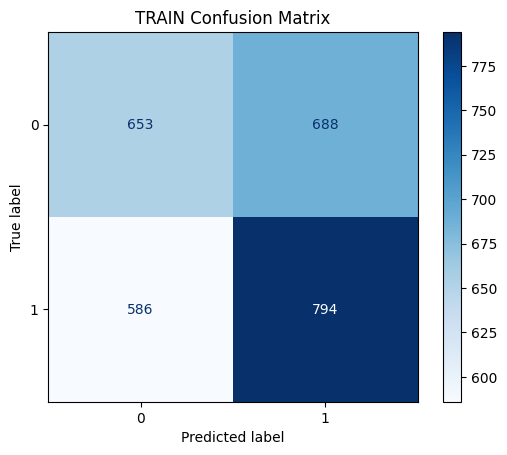


=== TEST Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       575
           1       0.51      0.55      0.53       592

    accuracy                           0.51      1167
   macro avg       0.50      0.50      0.50      1167
weighted avg       0.51      0.51      0.50      1167



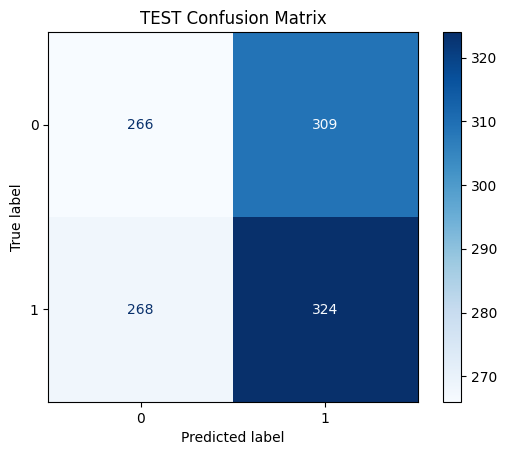

In [8]:
nb_model, X_tr, X_te, y_tr, y_te = naive_bayes(
    X, y_classification, train_ratio=0.7
)
evaluate_classification(nb_model, X_tr, y_tr, X_te, y_te)


### Interpretation  

##### 1 ) Performance-Übersicht  

| Datensatz | Accuracy | Precision&nbsp;0 / 1 | Recall&nbsp;(Sensitivität)&nbsp;0 / 1 | F1-Score&nbsp;0 / 1 | Klassen­verhältnis |
|-----------|---------:|----------------------|---------------------------------------|--------------------|--------------------|
| **Train** | **0.53** | 0.53 / 0.54 | 0.49 / 0.58 | 0.51 / 0.55 | 1341 : 1380 |
| **Test**  | **0.51** | 0.50 / 0.51 | 0.46 / 0.55 | 0.48 / 0.53 | 575 : 592 |

**Relevanz (Precision)**  
- Misst den Anteil der **korrekten positiven Vorhersagen** an allen „steigt“-Calls.  
- Wert ~0.51 auf dem Test-Set ⇒ Von 100 Long-Signalen sind knapp 51 tatsächlich steigende Perioden ⇒ jede zweite Position wäre unnötig.  

**Sensitivität (Recall)**  
- Misst den Anteil der **erkannten positiven Fälle** an allen tatsächlich steigenden Perioden.  
- Recall(1) = 0.55 ist höher als Recall(0) = 0.46 → Modell erkennt gut die Hälfte aller realen Anstiege, übersieht aber fast ebenso viele.  
- Geringer Recall(0) bedeutet, dass fast **54 %** der echten Rückgänge als „steigt“ fehlklassifiziert werden – kritisch, wenn Short-Side-Risiken abgesichert werden sollen.  

> **Gesamtbild:** Sowohl Relevanz als auch Sensitivität liegen knapp über dem Zufalls­niveau. Keines der beiden Qualitäts­kriterien ist in einem Trading-Kontext ausreichend, da Fehl­signale Transaktions­kosten und Drawdowns verursachen.

##### 2 ) Confusion-Matrix-Einordnung  

|                 | **Vorhergesagt 0** | **Vorhergesagt 1** |
|-----------------|-------------------:|-------------------:|
| **Tatsächlich 0** | 266 (Test) / 653 (Train) | 309 / 688 |
| **Tatsächlich 1** | 268 / 586 | 324 / 794 |

- **Fehler­symmetrie**: Falsch-Positiv- und Falsch-Negativ-Raten sind ähnlich hoch.  
- **Bias Richtung 1**: Das Modell bevorzugt Long-Signale ⇒ Recall(1) > Recall(0).  

##### 3 ) Warum performt Naive Bayes schwach?  

1. **Unabhängigkeits­annahme verletzt** – News-Features, Volumen & Returns sind korreliert.  
2. **Verteilungsform** – Gaussian-NB passt schlecht zu heavy-tailed Finanzdaten.  
3. **Kurzes Prognosefenster (30 min)** – Grundrauschen dominiert, Signal-to-Noise extrem klein.  
4. **Feature-Set** – identisch zur Regression; diskrete Schwellen oder Interaktionen fehlen.  

##### 4 ) Handlungsempfehlungen  

| Hebel | Idee |
|-------|------|
| **Baselines austauschen** | Regularisierte logistische Regression. |
| **Nicht-lineare Modelle** | Gradient Boosting, Random Forest, SVM, MLP. |
| **Feature Engineering** | Binning von Impact-Scores, Interaktion *Event-Typ × Impact*, Momentum-Indikatoren. |
| **Kostensensitive Lernziele** | Verlustmatrix an Long/Short-Kosten anpassen, Entscheidungs­schwelle optimieren. |
| **Kalibrierte Wahrscheinlichkeiten** | Platt/Isotonic Scaling, um Trades nur bei ≥ p* auszulösen. |

##### 5 ) TL;DR  

- **Accuracy & F1 ≈ 0.5** ⇒ Modell kaum besser als Münzwurf.  
- **Relevanz ~ Sensitivität** zeigen, dass jedes zweite Signal falsch ist und gut die Hälfte der wahren Bewegungen verpasst wird.  
- Kernprobleme: Naive-Bayes-Annahmen + geringes Richtungs­signal. Nicht-lineare Modelle und feature-reichere Repräsentationen sind nötig, um jenseits der 50-%-Schwelle zu kommen.

---


## **9. Lineare Diskriminanzanalyse (LDA)**

Hier wird eine LDA durchgeführt, um die Kursrichtung ebenfalls zu klassifizieren und die Ergebnisse mit dem Naive Bayes Modell zu vergleichen.


=== TRAIN Classification Report ===
              precision    recall  f1-score   support

           0       0.55      0.46      0.50      1341
           1       0.55      0.62      0.58      1380

    accuracy                           0.55      2721
   macro avg       0.55      0.54      0.54      2721
weighted avg       0.55      0.55      0.54      2721



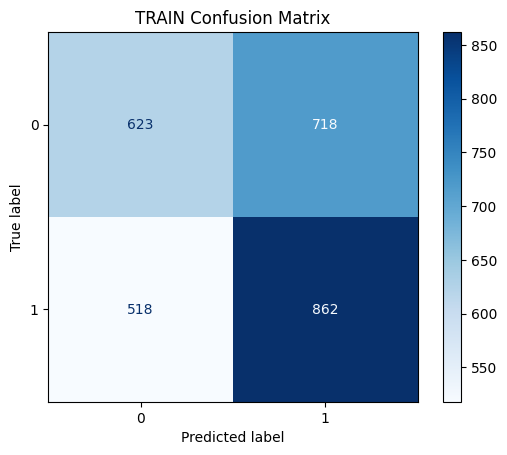


=== TEST Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.44      0.47       575
           1       0.52      0.58      0.55       592

    accuracy                           0.51      1167
   macro avg       0.51      0.51      0.51      1167
weighted avg       0.51      0.51      0.51      1167



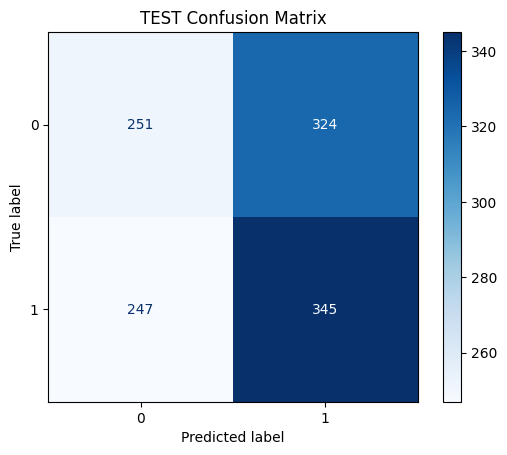

In [9]:
lda_model, X_tr2, X_te2, y_tr2, y_te2 = lda(
    X, y_classification, train_ratio=0.7
)
evaluate_classification(lda_model, X_tr2, y_tr2, X_te2, y_te2)


### Interpretation  

##### 1 ) Performance‐Übersicht  

| Datensatz | Accuracy | Precision&nbsp;(Relevanz)&nbsp;0 / 1 | Recall&nbsp;(Sensitivität)&nbsp;0 / 1 | F1-Score&nbsp;0 / 1 | Klassen­verhältnis |
|-----------|---------:|--------------------------------------|---------------------------------------|--------------------|--------------------|
| **Train** | **0.55** | 0.55 / 0.55 | 0.46 / 0.62 | 0.50 / 0.58 | 1341 : 1380 |
| **Test**  | **0.51** | 0.50 / 0.52 | 0.44 / 0.58 | 0.47 / 0.55 | 575 : 592 |

###### Relevanz (Precision)  
- **Class 0**: 0.50 → Von 100 „Fall“-Signalen sind nur 50 korrekt.  
- **Class 1**: 0.52 → Etwas bessere Trefferquote für „Steigt“, aber jedes zweite Long-Signal bleibt Fehltrade.

###### Sensitivität (Recall)  
- **Class 1 (0.58)** > **Class 0 (0.44)**. LDA erkennt ~58 % aller realen Anstiege, lässt aber 42 % unentdeckt.  
- Lediglich 44 % der tatsächlichen Rückgänge werden korrekt erkannt → Short-Chancen gehen oft verloren.

> **Bottom line:** Trotz leichter Verbesserung auf dem Trainings-Set (Acc 55 %) liegt die **Test-Accuracy bei 51 %**, kaum höher als Zufall. Relevanz und Sensitivität verharren um die 0.5-Marke – für profitables Intraday-Trading unzureichend.

##### 2 ) Confusion‐Matrix (Test-Set)  

|                 | **Prädi­ziert 0** | **Prädi­ziert 1** |
|-----------------|------------------:|------------------:|
| **Tatsäch­lich 0** | **251** (True Neg) | **324** (False Pos) |
| **Tatsäch­lich 1** | **247** (False Neg) | **345** (True Pos) |

- **Bias zu Klasse 1**: Mehr False-Positives als False-Negatives → Modell tendiert zu Long-Calls.  
- **Fehler­quote**: 571 von 1167 Beobachtungen sind Fehlklassifikationen (≈ 49 %).

##### 3 ) Vergleich zu Naive Bayes  

| Modell | Train-Acc | Test-Acc | Recall(1) | Hauptunterschied |
|--------|----------:|---------:|-----------:|------------------|
| **Naive Bayes** | 0.53 | 0.51 | 0.55 | Unabhängigkeits­annahme, Gaussian-Dichte |
| **LDA** | **0.55** | 0.51 | **0.58** | Nutzt Kovarianzstruktur → etwas mehr „Steigt“ erkannt, aber Generalisierung nicht besser |

> **Interpretation:** LDA eliminiert die starke Unabhängigkeits­annahme von NB und passt Mittelwert-Vektoren & gemeinsame Kovarianz an. Das bringt **+2 pp** Accuracy im Train-Set, **aber keinen Test-Gewinn** → Hinweis auf leichte Überanpassung und insgesamt schwaches Signal im Datensatz.

##### 4 ) Warum bleibt die Leistung limitiert?  

1. **Fast komplett überlappende Klassen** – 30-Min-Returns nähern sich einer zufälligen Binär­verteilung.  
2. **Lineare Entscheidungsgrenze** – Falls die Trennung im Feature-Raum nicht linear ist, kann LDA sie nicht erfassen.  
3. **Homoskedastizitätsannahme** – LDA nimmt gleiche Kovarianz­matrix für beide Klassen an; bei hetero­skedastischen Finanzdaten unrealistisch.  
4. **Feature-Set** – Identisch zum Regressionsmodell; keine speziell auf Richtung optimierten Signale (Momentum-Vorzeichen, Schwellen­indikatoren …).

##### 5 ) Handlungsempfehlungen  

| Bereich | Maßnahme |
|---------|----------|
| **Modell** | Quadratische DA (QDA) zulassen, Gradient Boosting, XGBoost, Random Forest, SVM mit RBF-Kernel. |
| **Regularisierung** | Shrinkage-LDA oder Ridge-Logit testen, um Varianz zu reduzieren. |
| **Feature Engineering** | Diskretisiertes „Impact > x“-Flag, gleitende Vorzeichenwechsel, Interaktion *Event-Typ × Impact*. |
| **Threshold-Tuning** | Statt fester 0.5-Schwelle kosten­sensitives ROC-/PR-Optimieren auf Sharpe Ratio oder Hit-Rate. |
| **Ensemble** | Combine directional classifier with volatility filter (only trade when |predicted return| > k·σ). |

##### 6 ) TL;DR  

- **LDA** schlägt Naive Bayes im Train-Set, **nicht** im Test-Set (Acc bleibt 51 %).  
- Leichter **Long-Bias**, Relevanz & Sensitivität um 0.5 – praktisch Münzwurf.  
- Limitierende Faktoren: Lineare Trennbarkeit, homoskedastische Annahme, geringes Richtungs­signal.  
- **Nicht-lineare, regularisierte oder ensemble-basierte Ansätze** + gezieltes Feature-Engineering sind nötig, um die 50 %-Barriere zu überwinden.

---


## **10. Logistische Regression**

Hier wird eine Logistische Regression durchgeführt, um die Kursrichtung ebenfalls zu klassifizieren und die Ergebnisse mit den anderen Klassifikationen zu vergleichen.


=== TRAIN Classification Report ===
              precision    recall  f1-score   support

           0       0.53      0.42      0.47      1341
           1       0.53      0.65      0.59      1380

    accuracy                           0.53      2721
   macro avg       0.53      0.53      0.53      2721
weighted avg       0.53      0.53      0.53      2721



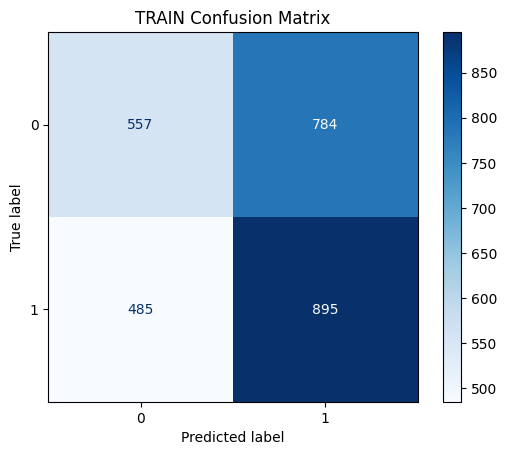


=== TEST Classification Report ===
              precision    recall  f1-score   support

           0       0.54      0.43      0.48       575
           1       0.54      0.64      0.58       592

    accuracy                           0.54      1167
   macro avg       0.54      0.53      0.53      1167
weighted avg       0.54      0.54      0.53      1167



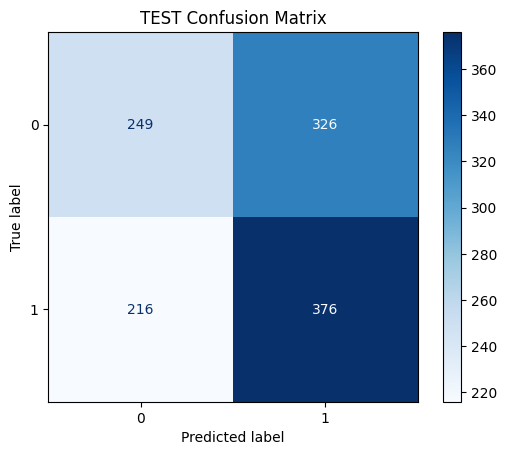

In [10]:
logreg_model, X_tr3, X_te3, y_tr3, y_te3 = logistic_regression_classifier(
    X,                      
    y_classification,        
    train_ratio=0.7         
)

evaluate_classification(logreg_model, X_tr3, y_tr3, X_te3, y_te3)

### Logistische Regression – Interpretation  

##### 1 ) Performance-Übersicht  

| Datensatz | Accuracy | Precision (Relevanz) 0 / 1 | Recall (Sensitivität) 0 / 1 | F1-Score 0 / 1 | Klassen­verhältnis |
|-----------|---------:|---------------------------|-----------------------------|-----------------|--------------------|
| **Train** | **0.53** | 0.53 / 0.53 | 0.42 / 0.65 | 0.47 / 0.59 | 1341 : 1380 |
| **Test**  | **0.54** | 0.54 / 0.54 | 0.43 / 0.64 | 0.48 / 0.58 | 575 : 592 |

**Relevanz (Precision)**  
- *Class 0* = 0.54 → Nur 54 % der „Fall“-Signale korrekt.  
- *Class 1* = 0.54 → Gleich hohe Treffer­quote für „Steigt“.  

**Sensitivität (Recall)**  
- *Class 1* = 0.64 → Modell findet knapp zwei Drittel aller realen Anstiege.  
- *Class 0* = 0.43 → Erkennt weniger als die Hälfte der tatsächlichen Rückgänge.  

> **Gesamtbild:** Mit **54 % Accuracy** schlägt die logistische Regression Naive Bayes und LDA um ~3 Prozentpunkte, bleibt aber nur knapp über Zufall.


##### 2 ) Confusion-Matrix (Test)  

|                 | **Pred 0** | **Pred 1** |
|-----------------|-----------:|-----------:|
| **True 0**      | **249**    | **326** |
| **True 1**      | **216**    | **376** |

- **Long-Bias:** 326 False-Positives vs. 216 False-Negatives → Modell tendiert zu Long-Calls.  
- **Fehler­rate:** 542 von 1167 Beobachtungen sind Fehl­klassifikationen (≈ 46 %).  


##### 3 ) Vergleich zu bisherigen Modellen  

| Modell | Test-Accuracy | Recall(1) | Recall(0) | Haupteindruck |
|--------|--------------:|----------:|----------:|---------------|
| Naive Bayes | 0.51 | 0.55 | 0.46 | Fast Zufall, starke Annahme­verletzungen |
| LDA | 0.51 | 0.58 | 0.44 | Linear, homoskedastisch, kaum Generalisierung + |
| **Logit** | **0.54** | **0.64** | 0.43 | Beste Recall (1), aber niedrige Recall (0); leichter Fortschritt |

> **Interpretation:** Die regularisierte logistische Regression profitiert davon, Feature-Korrelationen zuzulassen und eine probabilistische Schwelle zu optimieren. Dennoch bleibt das Richtungs­signal schwach.


##### 4 ) Warum bremst die Performance?  

1. **Klassenüberlappung:** Steigen/Fallen in 30 min ist größtenteils zufällig – Signal-to-Noise gering.  
2. **Lineare Entscheidungs­grenze:** Logit erfasst keine nicht-linearen Interaktionen zwischen News-Impact und Markt­zustand.  
3. **Asymmetrische Kosten nicht berücksichtigt:** Falsche Long-Signale (FP) können teuer sein, werden hier gleich gewichtet.  
4. **Unverändertes Feature-Set:** Noch immer rein numerische Aggregationen; keine Schwellen- oder Richtungs­­indikatoren.  


##### 5 ) Handlungsempfehlungen  

| Bereich | Maßnahme |
|---------|----------|
| **Schwellen­optimierung** | ROC/PR-Kurven analysieren, Schwelle > 0.5 an Kosten/Nutzen anpassen. |
| **Nicht-lineare Modelle** | Gradient Boosting (XGBoost, LightGBM), Random Forest, SVM-RBF, MLP. |
| **Feature Engineering** | Diskrete Flags (Impact > x), Momentum-Vorzeichen, Interaktion *Event-Typ × Impact*, Intraday-Seasonality. |
| **Kostensensitives Lernen** | Custom Loss, Gewichtung FP vs. FN entsprechend Handels­strategie. |
| **Ensembles/Stacking** | Kombinieren von Logit-Wahrscheinlichkeiten mit Volatilitäts-Regressor → nur traden, wenn |pred_return| über Schwellwert liegt. |



##### 6 ) TL;DR  

- **Logistische Regression verbessert Accuracy auf 54 %** – bestes Ergebnis der drei Grundlagen­modelle, aber weiterhin nur knapp über Münzwurf.  
- **Recall (1) = 0.64** → erkennt die Mehrzahl der Anstiege, übersieht jedoch viele Rückgänge und produziert viele Long-Fehltrades.  
- **Linearität & Feat**

---
